In [5]:
from importlib.metadata import files

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

# Import data
from desc_exp_1 import apples

         Date    Open    High     Low   Close    Volume  Adj Close
0    1/3/2011  325.64  330.26  324.84  329.57  15883600     329.57
1    1/4/2011  332.44  332.50  328.15  331.29  11038600     331.29
2    1/5/2011  329.55  334.34  329.50  334.00   9058700     334.00
3    1/6/2011  334.72  335.25  332.90  333.73  10709500     333.73
4    1/7/2011  333.99  336.35  331.90  336.12  11096800     336.12
5   1/10/2011  338.83  343.23  337.17  342.45  16000400     342.45
6   1/11/2011  344.88  344.96  339.47  341.64  15814500     341.64
7   1/12/2011  343.25  344.43  342.00  344.42  10790700     344.42
8   1/13/2011  345.16  346.64  343.85  345.68  10599300     345.68
9   1/14/2011  345.89  348.48  344.44  348.48  10998600     348.48
10  1/18/2011  329.52  344.76  326.00  340.65  66831600     340.65
11  1/19/2011  348.35  348.60  336.88  338.84  40494700     338.84
12  1/20/2011  336.43  338.30  330.12  332.68  27290500     332.68
13  1/21/2011  333.77  334.88  326.63  326.72  26915000     32

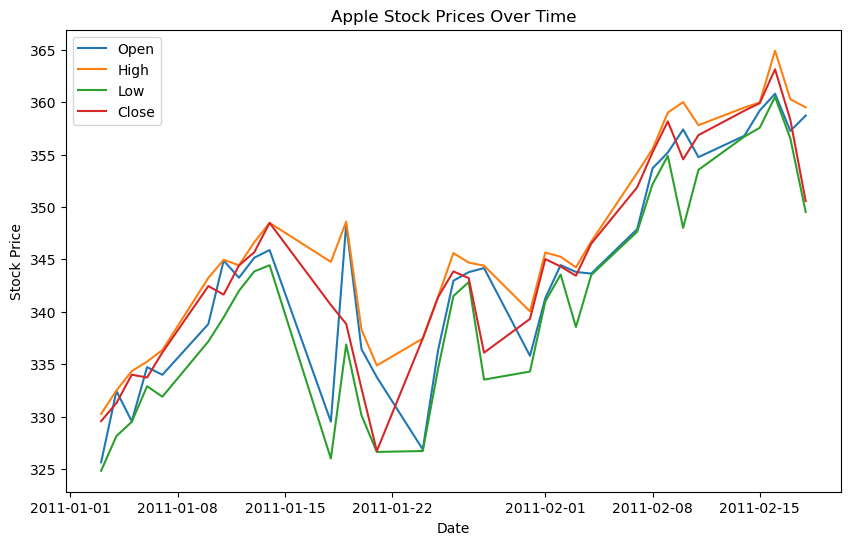

In [15]:
# Line plot for each column so we can explore the data
date = apples['Date']
open_a = apples['Open']
high = apples['High']
low = apples['Low']
close = apples['Close']
volume = apples['Volume']

# Convert date column to date_time
apples['Date'] = pd.to_datetime(apples['Date'])

# Set 'Date' as the index to make it easier for plotting
apples.set_index('Date', inplace=True)

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot different columns
plt.plot(apples.index, apples['Open'], label='Open')
plt.plot(apples.index, apples['High'], label='High')
plt.plot(apples.index, apples['Low'], label='Low')
plt.plot(apples.index, apples['Close'], label='Close')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Apple Stock Prices Over Time')
plt.legend()  # Adds a legend to differentiate the lines

# Display the plot
plt.show()

**Observations and questions**
- Do low's and high's correlate?
- Open seems to shoot down before a sharp rise?
    - Below previous close
    - Crossing over close on the way down
    - Seems to be periods with the biggest gap between high and low
    - e.g. ~01/05, 01/10, 01/22, 01/30, 02/03, 02/10
    - Is this a pattern that we can test?
- Periods of rise appear to have few fluctuations
    - 01/01 - 01/15 and 02/01 - 02/15
- Open is almost always higher than the low
- Open is almost always lower than the high